## importing libraries

In [1]:
import numpy as np
import pandas as pd
import pygam
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### load data

In [2]:
data = pd.read_csv('data2020-full_Boston.txt', sep=",", header=0)
data.U_BDRMS = data.U_BDRMS.replace(np.nan, 0)
data = data.sample(n=10000)
data=data[['AV_TOTAL', 'AV_BLDG','PTYPE', 'LAND_SF', 'GROSS_TAX', 'U_BDRMS']]
data.head()

,AV_TOTAL,AV_BLDG,PTYPE,LAND_SF,GROSS_TAX,U_BDRMS
21708,1984000,1984000,102,0,20951.04,2.0
59473,42383500,2036200,986,678665,0.00,0.0
123370,8500,0,132,1200,89.76,0.0
149388,518200,365600,101,5037,5472.19,0.0
66019,924500,924500,102,0,9762.71,3.0


### descriptive statistics

In [3]:
# scatter matrix
X = data[['LAND_SF', 'GROSS_TAX', 'U_BDRMS']].values
y = data['AV_TOTAL'].values
X = np.log1p(X)
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
df = pd.DataFrame(np.c_[y_train, X_train], columns=['log(AV_TOTAL)', 'log(LAND_SF)', 'log(GROSS_TAX)', 'log(U_BDRMS)'])

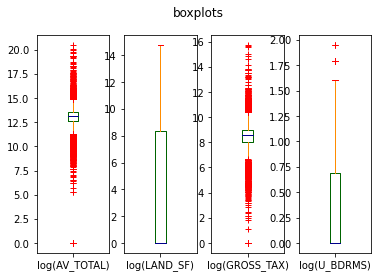

In [4]:
fig, axes = plt.subplots(1,4)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')
df.plot(kind='box', ax=axes, subplots=True, title='boxplots', color=color, sym='r+')
plt.show()

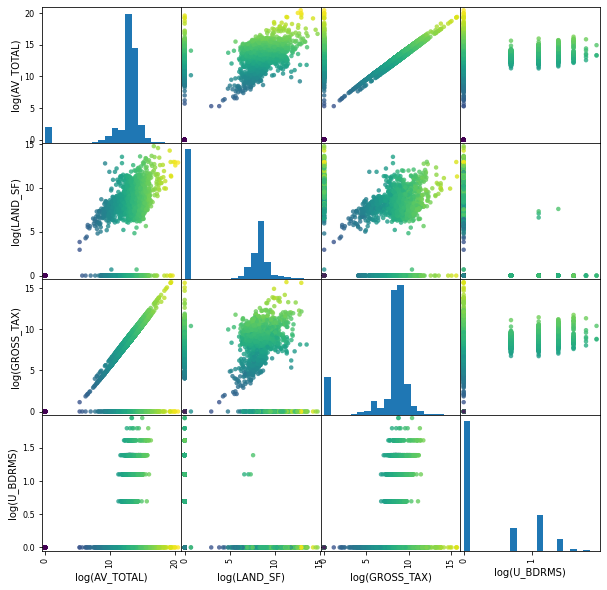

In [5]:
# scatter_matrix
pd.plotting.scatter_matrix(df, c = y_train, figsize=(10, 10), marker='o', hist_kwds={'bins':20}, s=20, alpha=.8)
plt.show()

### correlation

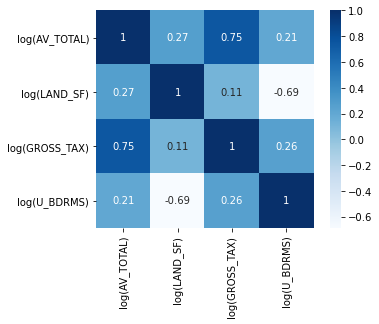

In [6]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

### Generalized Additive Models

In [7]:
X = data[['LAND_SF', 'GROSS_TAX', 'U_BDRMS']].values
y = data['AV_TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# l: linear terms; s: spline terms
gam = pygam.LinearGAM(pygam.s(0) + pygam.s(1) + pygam.l(2))
gam.gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + l(2) + intercept, 
   tol=0.0001, verbose=False)

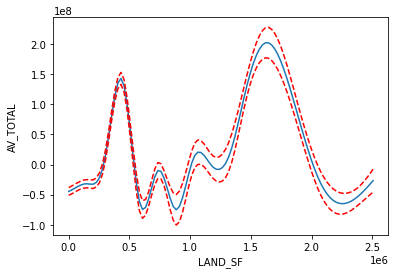

In [8]:
XX = gam.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')
plt.xlabel("LAND_SF")
plt.ylabel("AV_TOTAL")
plt.show()

There is a non-linear relationship between LAND_SF and AV_TOTAL.

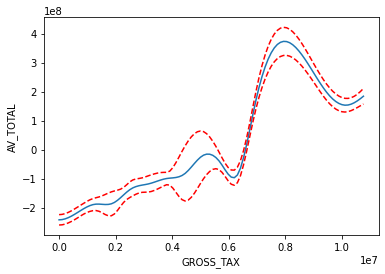

In [9]:
XX = gam.generate_X_grid(term=1)
plt.plot(XX[:, 1], gam.partial_dependence(term=1, X=XX))
plt.plot(XX[:, 1], gam.partial_dependence(term=1, X=XX, width=.95)[1], c='r', ls='--')
plt.xlabel("GROSS_TAX")
plt.ylabel("AV_TOTAL")
plt.show()

There is a non-linear relationship between GROSS_TAX and AV_TOTAL.